Car Sales in Mexico

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np
import matplotlib.ticker as mtick

# URL from Excel file
url_InegiCars = "https://www.inegi.org.mx/contenidos/datosprimarios/iavl/tabulados/8_Ventas_serie.xlsx"

# Read file from url 
df_CarsMex = pd.read_excel(url_InegiCars, header=5)  
ultima_fila = df_CarsMex.iloc[-5]

# Print de data 
print(df_CarsMex.head())
print(ultima_fila)

                            Tema     Año    Mes  Marca         Modelo  \
0  Venta al público de vehículos  2005.0  Enero  Acura            Mdx   
1  Venta al público de vehículos  2005.0  Enero  Acura             Rl   
2  Venta al público de vehículos  2005.0  Enero  Acura        Tl 3.5l   
3  Venta al público de vehículos  2005.0  Enero   Audi             A3   
4  Venta al público de vehículos  2005.0  Enero   Audi  A4 1.8 Cabrio   

               Tipo Segmento     Origen     País origen Cantidad  
0  Camiones ligeros    SUV's  Importado          Canadá       18  
1       Automóviles  De Lujo  Importado           Japón        4  
2       Automóviles  De Lujo  Importado  Estados Unidos       38  
3       Automóviles  De Lujo  Importado          Brasil       74  
4       Automóviles  De Lujo  Importado        Alemania        9  
Tema           Venta al publico de vehículos
Año                                   2024.0
Mes                                    Marzo
Marca                   

In [143]:
# Convert "Cantidad" column into numeric
df_CarsMex['Cantidad'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce')

# Group the data in Segments
suma_por_segmento = df_CarsMex.groupby('Segmento')['Cantidad'].sum()
print(suma_por_segmento)

Segmento
Compactos       4984017.0
De Lujo          917018.0
Deportivos       157846.0
Minivans         438385.0
Pick Ups        3534207.0
SUV's           5100065.0
Subcompactos    6949016.0
Name: Cantidad, dtype: float64


{2019: Segmento
Compactos       261733.0
De Lujo          47156.0
Deportivos        7667.0
Minivans         16952.0
Pick Ups        193536.0
SUV's           343650.0
Subcompactos    447237.0
Name: Cantidad, dtype: float64, 2020: Segmento
Compactos       210929.0
De Lujo          31249.0
Deportivos        5674.0
Minivans          9916.0
Pick Ups        155411.0
SUV's           252303.0
Subcompactos    284581.0
Name: Cantidad, dtype: float64, 2021: Segmento
Compactos       202332.0
De Lujo          28655.0
Deportivos        5276.0
Minivans         14664.0
Pick Ups        161438.0
SUV's           318521.0
Subcompactos    283849.0
Name: Cantidad, dtype: float64, 2022: Segmento
Compactos       213032.0
De Lujo          30142.0
Deportivos        4917.0
Minivans         24076.0
Pick Ups        189732.0
SUV's           393958.0
Subcompactos    238871.0
Name: Cantidad, dtype: float64, 2023: Segmento
Compactos       276597.0
De Lujo          35083.0
Deportivos        6017.0
Minivans         2505

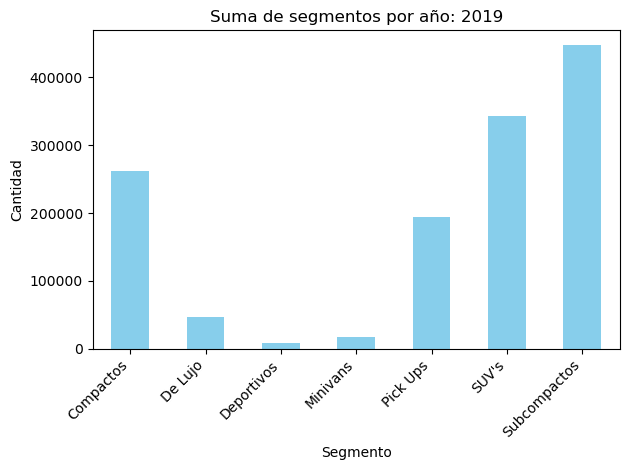

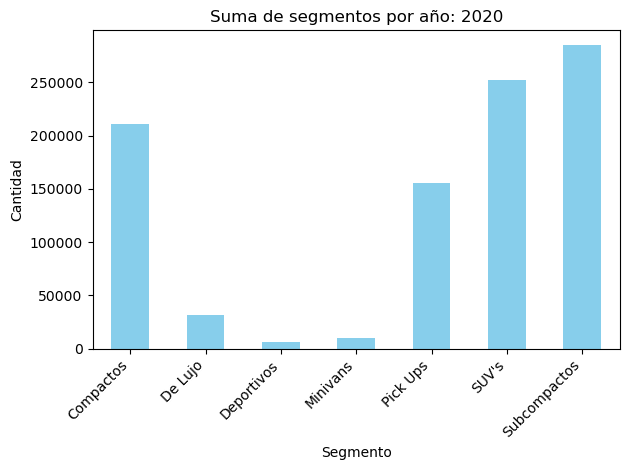

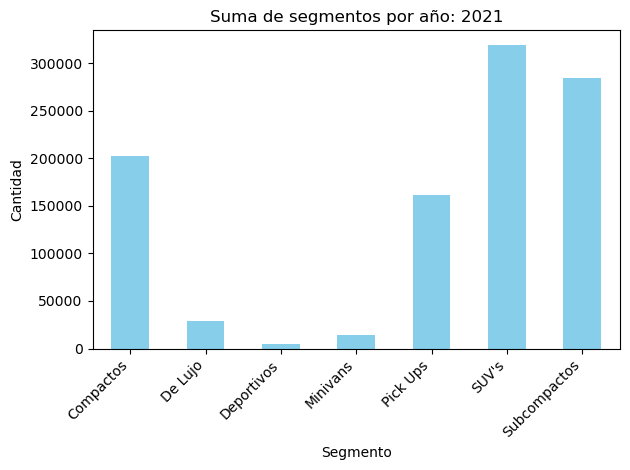

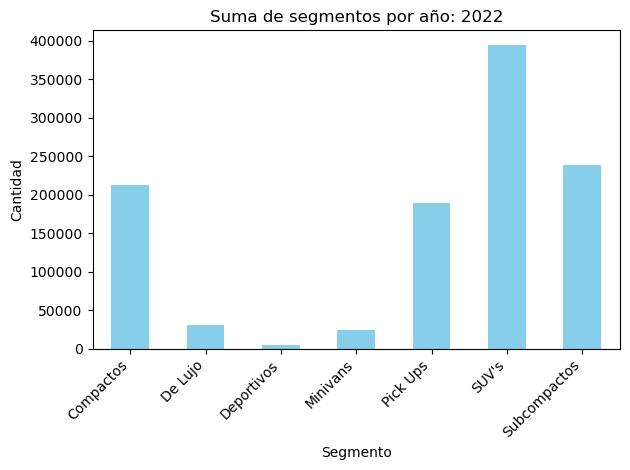

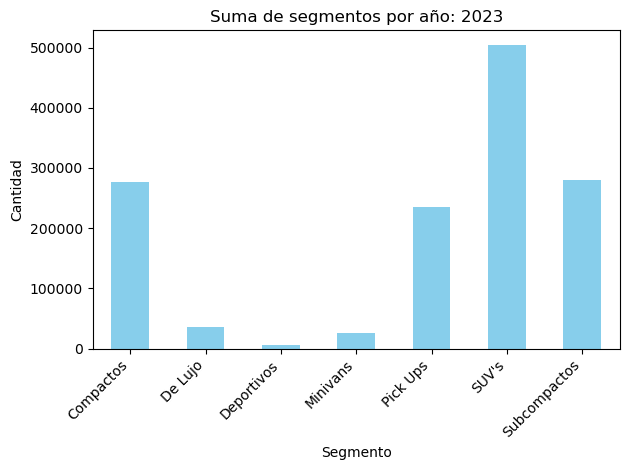

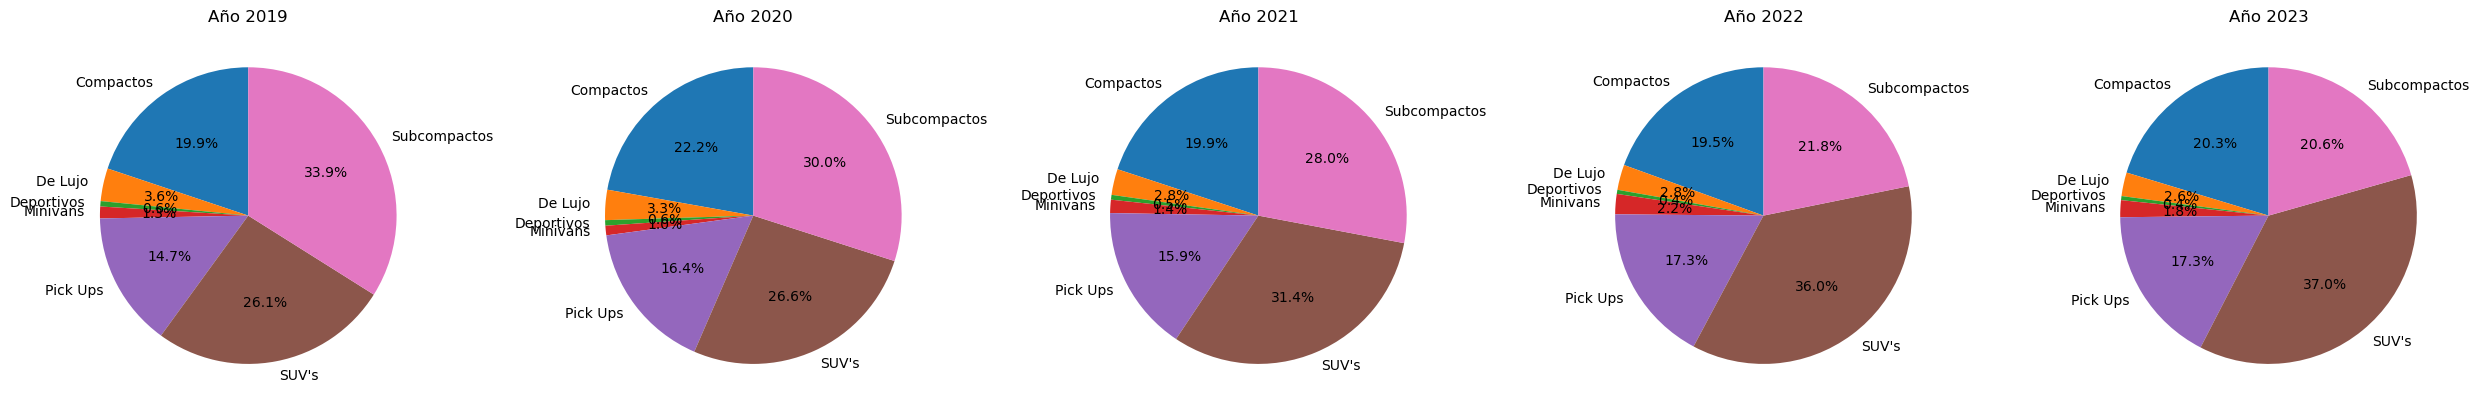

In [144]:
años_interes = [2019, 2020, 2021, 2022, 2023]

# Create a dictionary to store volume by years selected
conteo_por_año = {}

# Iterate over the years of interest
for año in años_interes:
    datos_año = df_CarsMex[df_CarsMex['Año'] == año]
    
    # Group into segments
    conteo_segmentos_año = datos_año.groupby('Segmento')['Cantidad'].sum()
    conteo_por_año[año] = conteo_segmentos_año

print(conteo_por_año)

# Create a bar chart for every year
for año, conteo_segmentos_año in conteo_por_año.items():
    plt.figure()
    conteo_segmentos_año.plot(kind='bar', color='skyblue')
    plt.title(f'Suma de segmentos por año: {año}')
    plt.xlabel('Segmento')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

# Create the chart
plt.figure(figsize=(25, 6))

# Iterate over the years and create pie charts
for año, conteo_segmentos_año in conteo_por_año.items():
    plt.subplot(1, len(años_interes), list(conteo_por_año.keys()).index(año) + 1)
    plt.pie(conteo_segmentos_año, labels=conteo_segmentos_año.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Año {año}')

# Adjust spaces between the pie charts
plt.tight_layout()

# Show the charts
plt.show()

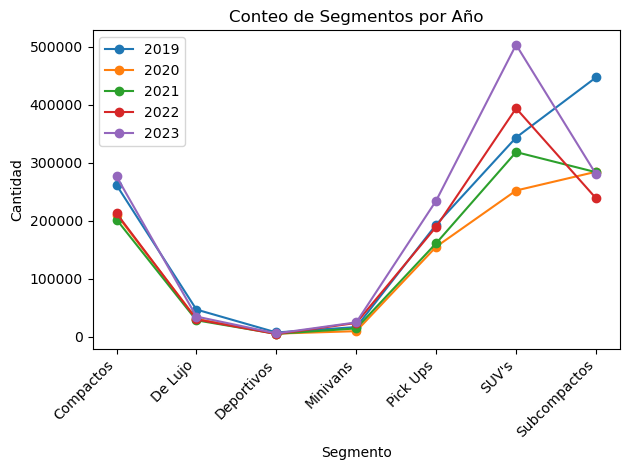

In [145]:
# Iterar sobre los años y graficar los conteos de segmentos
for año, conteo_segmentos_año in conteo_por_año.items():
    plt.plot(conteo_segmentos_año.index, conteo_segmentos_año.values, label=str(año), marker='o')

# Agregar título y etiquetas de los ejes
plt.title('Conteo de Segmentos por Año')
plt.xlabel('Segmento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Ajustar los límites de los ejes para hacer el gráfico más alejado
#plt.xlim(left=-0.5)  # Para mostrar un poco más a la izquierda
#plt.ylim(bottom=0)   # Y no tener números negativos en el eje y

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [146]:
años_interes = [2005, 2010, 2015, 2020, 2023]

# Crear un diccionario para almacenar los conteos de segmentos por año
conteo_por_año = {}

# Iterar sobre los años de interés
for año in años_interes:
    datos_año = df_CarsMex[df_CarsMex['Año'] == año]
    
    # Agrupar por segmento y sumar la cantidad correspondiente
    conteo_segmentos_año = datos_año.groupby('Segmento')['Cantidad'].sum()
    
    conteo_por_año[año] = conteo_segmentos_año

print(conteo_por_año)

{2005: Segmento
Compactos       215653.0
De Lujo          42527.0
Deportivos        7190.0
Minivans         53374.0
Pick Ups        199321.0
SUV's           165062.0
Subcompactos    448641.0
Name: Cantidad, dtype: float64, 2010: Segmento
Compactos       214976.0
De Lujo          37183.0
Deportivos       11884.0
Minivans         18225.0
Pick Ups        150157.0
SUV's           148276.0
Subcompactos    239712.0
Name: Cantidad, dtype: float64, 2015: Segmento
Compactos       313728.0
De Lujo          62686.0
Deportivos       10264.0
Minivans         14311.0
Pick Ups        180073.0
SUV's           280079.0
Subcompactos    493303.0
Name: Cantidad, dtype: float64, 2020: Segmento
Compactos       210929.0
De Lujo          31249.0
Deportivos        5674.0
Minivans          9916.0
Pick Ups        155411.0
SUV's           252303.0
Subcompactos    284581.0
Name: Cantidad, dtype: float64, 2023: Segmento
Compactos       276597.0
De Lujo          35083.0
Deportivos        6017.0
Minivans         2505

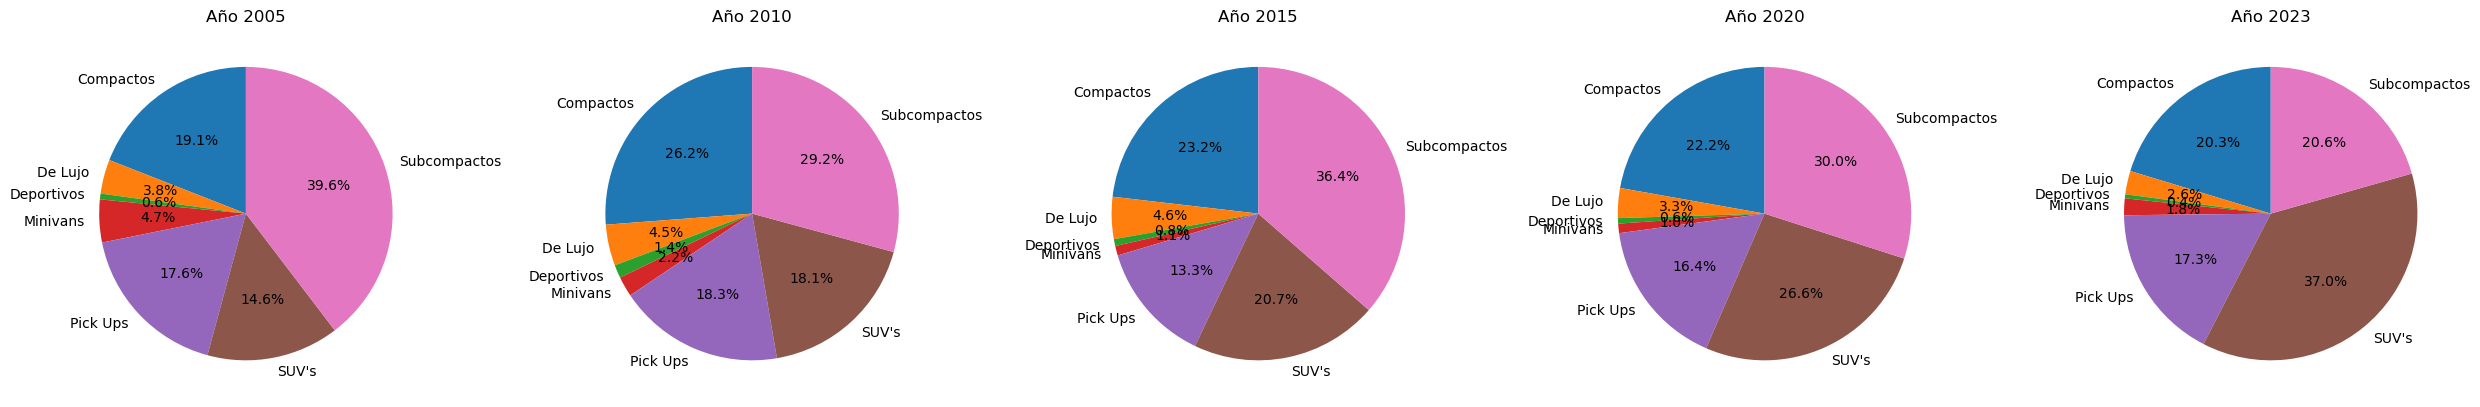

In [147]:
# Create the figure and the axis
plt.figure(figsize=(25, 6))

# Iterate over the years and pie chart the volumes
for año, conteo_segmentos_año in conteo_por_año.items():
    plt.subplot(1, len(años_interes), list(conteo_por_año.keys()).index(año) + 1)
    plt.pie(conteo_segmentos_año, labels=conteo_segmentos_año.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Año {año}')

# Adjust spaces between charts
plt.tight_layout()

# Show the charts
plt.show()

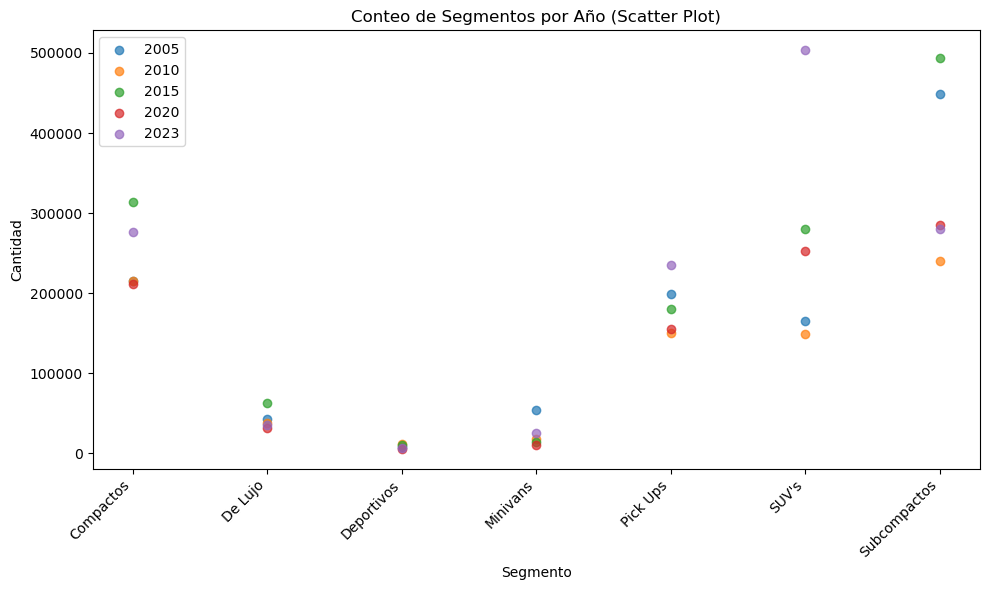

In [148]:
# Create the chart
plt.figure(figsize=(10, 6))

# Iterate over the years and create a scatter plot
for año, conteo_segmentos_año in conteo_por_año.items():
    plt.scatter(conteo_segmentos_año.index, conteo_segmentos_año.values, label=str(año), alpha=0.7)

# Add title and labels
plt.title('Conteo de Segmentos por Año (Scatter Plot)')
plt.xlabel('Segmento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()

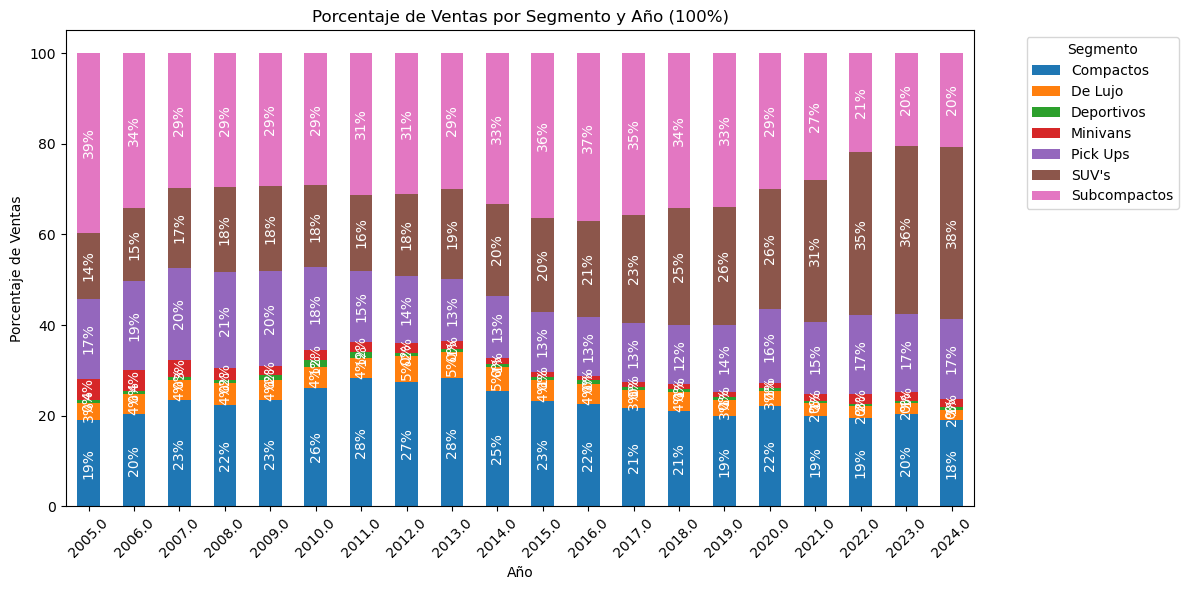

In [149]:
# Calculate total sales my year
ventas_por_ano = df_CarsMex.groupby('Año')['Cantidad'].sum()
# Group sales by segment
ventas_por_segmento_ano = df_CarsMex.groupby(['Año', 'Segmento'])['Cantidad'].sum().unstack()
# Calculate percentage by segment
porcentaje_ventas = ventas_por_segmento_ano.div(ventas_por_ano, axis=0) * 100
# Create stacked columns chart
ax = porcentaje_ventas.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Porcentaje de Ventas por Segmento y Año (100%)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add bar labels rotated 90 degrees up with white font and no decimals
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', rotation=90, color='white')

plt.show()

In [150]:
# Convert the 'Cantidad' column to numeric type
df_CarsMex['Cantidad'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce') 

# Drop rows with NaN values in the 'Cantidad' column
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad']) 

# Create a DataFrame with columns to total: Year, Cantidad
ventas_por_año_df = pd.DataFrame(df_CarsMex.groupby(df_CarsMex["Año"])["Cantidad"].sum())
ventas_por_año_df.reset_index(drop=False, inplace=True)

# Format 'Cantidad' column with commas and no decimals
ventas_por_año_df['Año'] = ventas_por_año_df['Año'].astype(int)
ventas_por_año_df['Cantidad'] = ventas_por_año_df['Cantidad'].astype(int)

# Drop the row corresponding to the year 2024
ventas_por_año_df = ventas_por_año_df.drop(19)
ventas_por_año_df

,Año,Cantidad
0,2005,1131768
1,2006,1139736
2,2007,1099890
3,2008,1025544
4,2009,754925
5,2010,820413
6,2011,905893
7,2012,988042
8,2013,1065098
9,2014,1136965


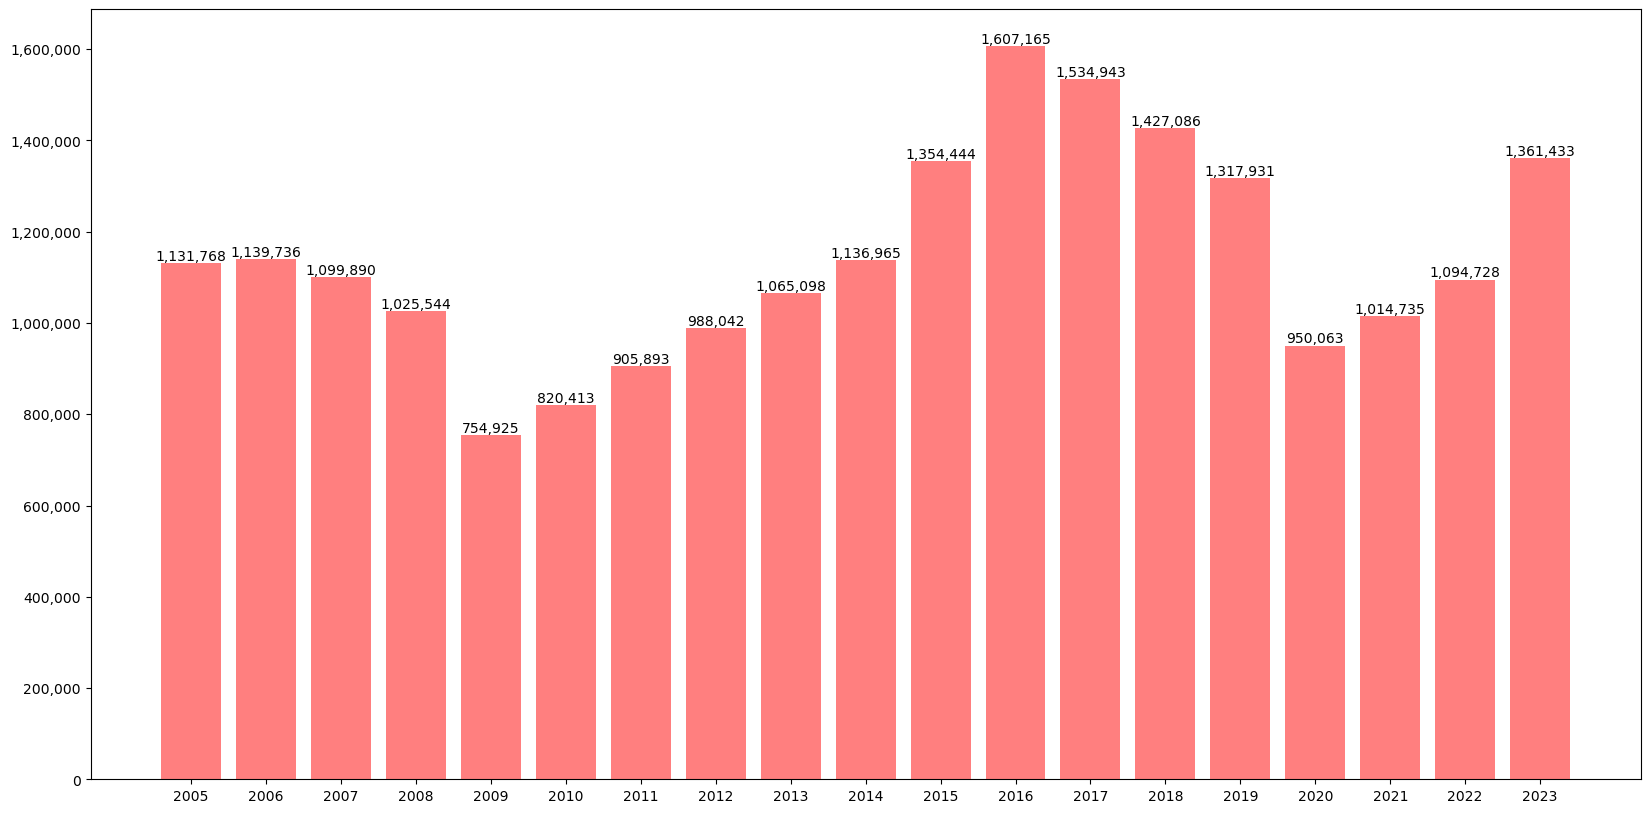

In [151]:
# Set x axis and tick locations
x_axis = np.arange(len(ventas_por_año_df))
tick_locations = [value for value in x_axis]
labels = ventas_por_año_df["Cantidad"]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
bars = plt.bar(x_axis, ventas_por_año_df["Cantidad"], color='r', alpha=0.5, align="center")

# Format y-axis labels with comma separator
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Format labels on bars with comma separator
for bar, label in zip(bars, labels):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:,.0f}'.format(label), ha='center', va='bottom')

plt.xticks(tick_locations, ventas_por_año_df["Año"])
plt.show()

In [153]:
# Group the data by brand and sum the sales for each brand
ventas_por_marca = df_CarsMex.groupby('Marca')['Cantidad'].sum()

# Sort the sales by brand in descending order
ventas_por_marca = ventas_por_marca.sort_values(ascending=False)

# Convert the Series into a DataFrame
df_ventas_por_marca = ventas_por_marca.reset_index()

# Add 1 to the index so it starts from 1
df_ventas_por_marca.index += 1

# Rename the sales column
df_ventas_por_marca.columns = ['Marca', 'Ventas']

# Show the top 5 selling brands
df_ventas_por_marca.head(5)

,Marca,Ventas
1,Nissan,4822867.0
2,General Motors,3952442.0
3,Volkswagen,2630230.0
4,Ford Motor,1725011.0
5,Chrysler,1560869.0


In [154]:
# Create a dictionary to store DataFrames by year
resultados_por_año = {}

# Iterate from year 2023 to 2013
for year in range(2023, 2012, -1):
    # Filter the data for the current year
    ventas_year = df_CarsMex[df_CarsMex['Año'] == year]
    # Group the filtered data by brand and sum the sales for each brand
    ventas_por_marca_year = ventas_year.groupby('Marca')['Cantidad'].sum()
    # Sort the sales by brand in descending order
    ventas_por_marca_year = ventas_por_marca_year.sort_values(ascending=False)
    # Convert the Series into a DataFrame, reset index without dropping the old index
    df_ventas_por_marca_year = ventas_por_marca_year.reset_index().reset_index(drop=True)
    # Add 1 to the index
    df_ventas_por_marca_year.index += 1
    # Rename the sales column
    df_ventas_por_marca_year.columns = ['Marca', 'Ventas']
    # Add an additional column for the year
    df_ventas_por_marca_year['Año'] = year
    # Store the DataFrame in the dictionary
    resultados_por_año[year] = df_ventas_por_marca_year

# Show each DataFrame by year
for year, df in resultados_por_año.items():
    # Assign each DataFrame to a variable with the corresponding year name
    globals()[f'df_resultados_{year}'] = df

# Show the created variables
df_resultados_2023

,Marca,Ventas,Año
1,Nissan,241056.0,2023
2,General Motors,184051.0,2023
3,Volkswagen,113975.0,2023
4,Toyota,104113.0,2023
5,KIA,93490.0,2023
6,Mazda,76017.0,2023
7,Chrysler,71376.0,2023
8,MG Motor,60128.0,2023
9,Hyundai,49757.0,2023
10,Ford Motor,47968.0,2023


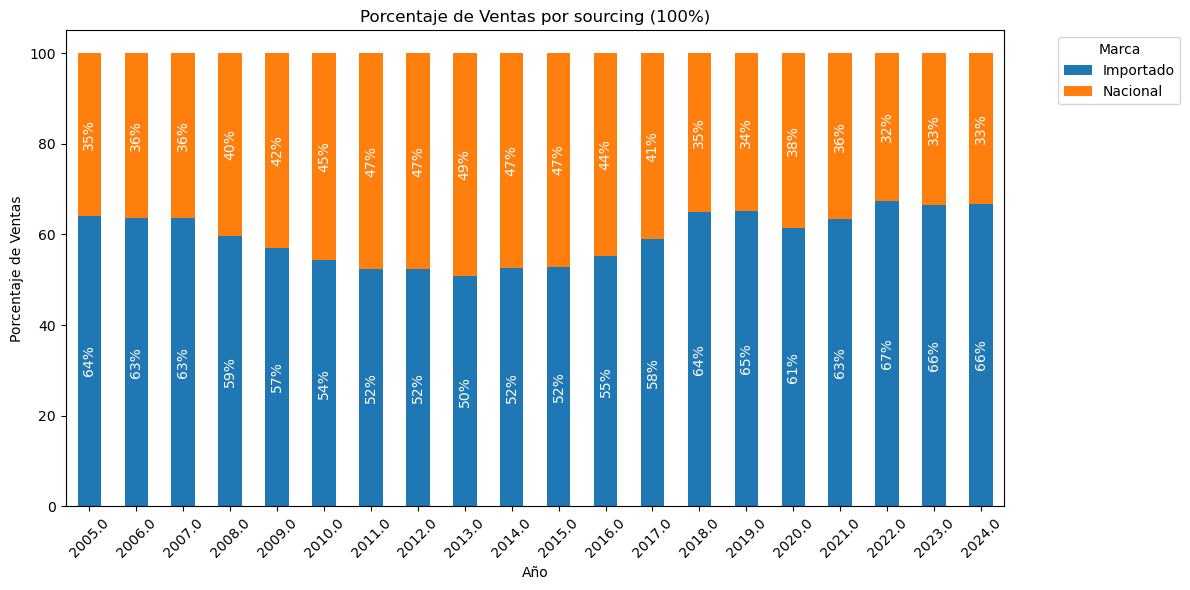

In [160]:
# Group by year and origin, and sum the sales
ventas_por_origen_ano = df_CarsMex.groupby(['Año', 'Origen'])['Cantidad'].sum().unstack()

# Calculate the total sales per year
ventas_por_ano1 = ventas_por_origen_ano.sum(axis=1)

# Calculate the percentage of sales for each origin by year
porcentaje_ventas = ventas_por_origen_ano.div(ventas_por_ano1, axis=0) * 100

# Plot the stacked bar chart
ax = porcentaje_ventas.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Porcentaje de Ventas por sourcing (100%)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', rotation=90, color='white')

plt.show()

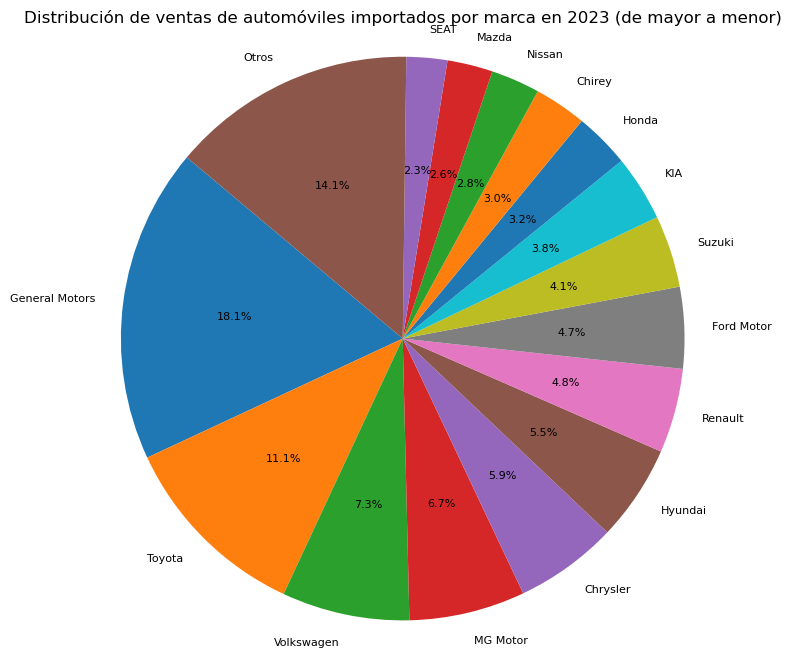

In [123]:
# Filtrar las ventas de automóviles importados en 2023
ventas_importados_2024 = df_CarsMex[(df_CarsMex['Origen'] == 'Importado') & (df_CarsMex['Año'] == 2023)]
# Agrupar por marca y sumar las ventas
ventas_por_marca = ventas_importados_2024.groupby('Marca')['Cantidad'].sum()
# Ordenar las ventas por marca de mayor a menor
ventas_por_marca_sorted = ventas_por_marca.sort_values(ascending=False)
# Filtrar las marcas más importantes y agrupar el resto en "Otros"
marcas_principales = ventas_por_marca_sorted.head(15)
otros = pd.Series(ventas_por_marca_sorted[15:].sum(), index=['Otros'])
# Combinar las marcas principales con "Otros"
ventas_por_marca_final = pd.concat([marcas_principales, otros])
# Crear el gráfico de pastel con las marcas principales y "Otros"
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_marca_final, labels=ventas_por_marca_final.index, startangle=140, autopct='%1.1f%%',textprops={'fontsize': 8})
plt.title('Distribución de ventas de automóviles importados por marca en 2023 (de mayor a menor)')
plt.axis('equal')
plt.show()

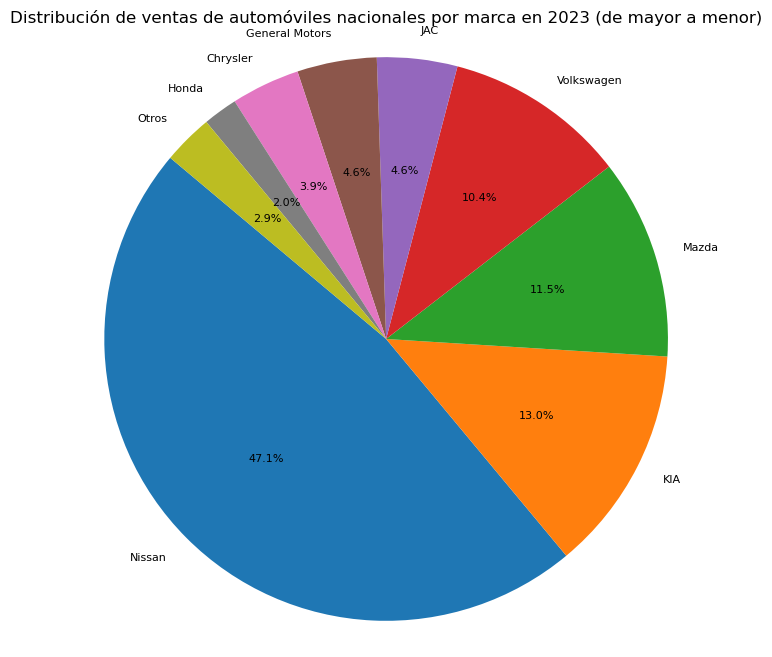

In [124]:
# Filtrar las ventas de automóviles nacionales en 2023
ventas_nacionales_2024 = df_CarsMex[(df_CarsMex['Origen'] == 'Nacional') & (df_CarsMex['Año'] == 2023)]
# Agrupar por marca y sumar las ventas
ventas_por_marca_nacionales = ventas_nacionales_2024.groupby('Marca')['Cantidad'].sum()
# Ordenar las ventas por marca de mayor a menor
ventas_por_marca_nacionales_sorted = ventas_por_marca_nacionales.sort_values(ascending=False)
# Filtrar las marcas más importantes y agrupar el resto en "Otros"
marcas_principales_nacionales = ventas_por_marca_nacionales_sorted.head(8)
otros_nacionales = pd.Series(ventas_por_marca_nacionales_sorted[8:].sum(), index=['Otros'])
# Combinar las marcas principales con "Otros"
ventas_por_marca_final_nacionales = pd.concat([marcas_principales_nacionales, otros_nacionales])
# Crear el gráfico de pastel con las marcas principales y "Otros" para los automóviles nacionales en 2024
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_marca_final_nacionales, labels=ventas_por_marca_final_nacionales.index, startangle=140, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Distribución de ventas de automóviles nacionales por marca en 2023 (de mayor a menor)')
plt.axis('equal')
plt.show()

In [125]:
#Agrupando por modelo por año
Quantity_year_model = df_CarsMex.groupby(['Año', 'Modelo', 'País origen'])['Cantidad'].sum()

In [126]:
#Convirtiendo la serie en un data frame
Quantity_year_model = Quantity_year_model.reset_index()
#Ordenando por modelo más vendido por año
Ord_df = Quantity_year_model.sort_values(by=['Año', 'Cantidad', 'Modelo'], ascending=[True, False, False])

In [127]:
# Paso 2: Agrupa los datos por año
grouped = Ord_df.groupby('Año')
# Paso 3: Aplica una función a cada grupo para tomar los primeros 5 registros y sumar el resto
resultados = []
for _, group in grouped:
    top_10 = group.head(19)
    resto = group.iloc[19:]
    suma_resto = pd.DataFrame(resto.sum()).T
    suma_resto['Modelo'] = 'Suma Resto'
    suma_resto['País origen'] = 'Resto'
    suma_resto['Año'] = group.iloc[0]['Año']
    top_10_and_suma_resto = pd.concat([top_10, suma_resto], ignore_index=True)
    resultados.append(top_10_and_suma_resto)
# Paso 4: Concatena los resultados en un nuevo DataFrame
nuevo_df = pd.concat(resultados, ignore_index=True)

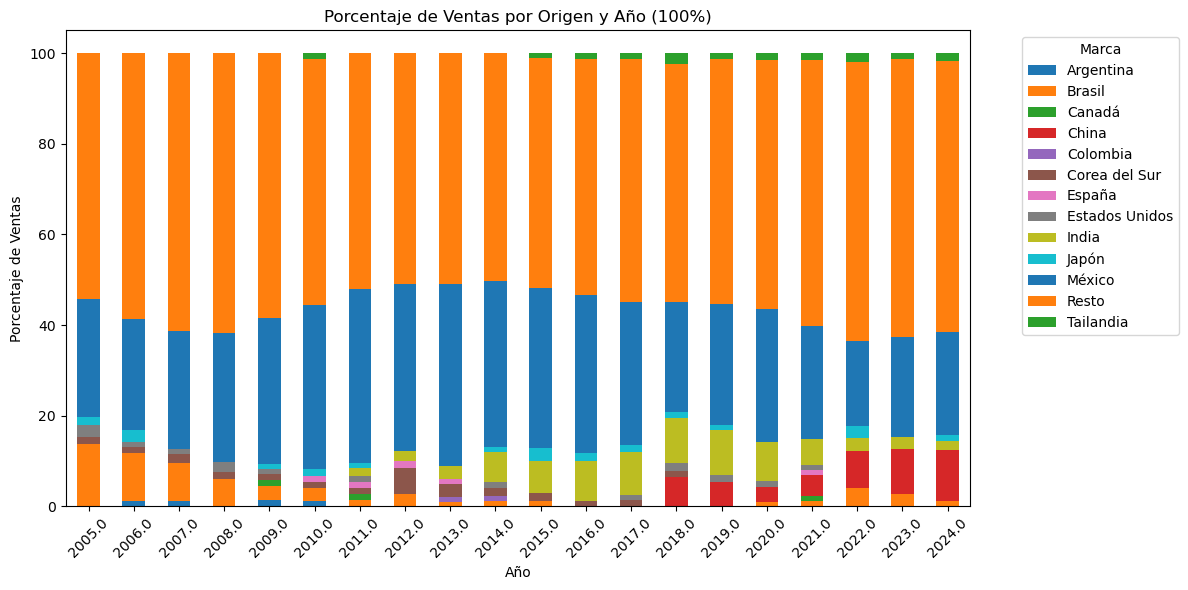

In [128]:
# Agrupar por año y marca, y sumar las ventas
ventas_por_origen_ano = nuevo_df.groupby(['Año', 'País origen'])['Cantidad'].sum().unstack()
# Calcular el total de ventas por año
ventas_por_ano1 = ventas_por_origen_ano.sum(axis=1)
# Calcular el porcentaje de ventas de cada marca por año
porcentaje_ventas = ventas_por_origen_ano.div(ventas_por_ano1, axis=0) * 100
# Graficar la gráfica de barras de 100%
porcentaje_ventas.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Porcentaje de Ventas por Origen y Año (100%)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

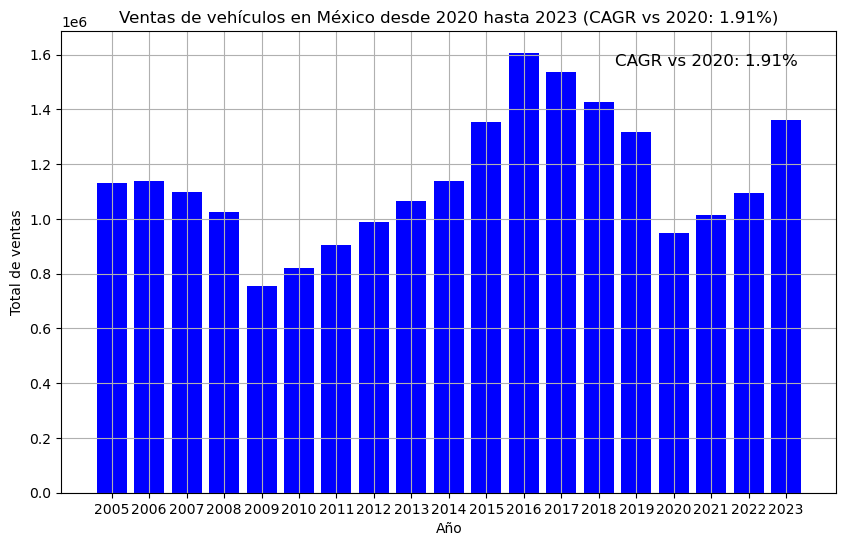

In [129]:
# Eliminar filas con valores NaN en la columna 'Cantidad'
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad'])
# Convertir el año a tipo int para facilitar la visualización
df_CarsMex['Año'] = df_CarsMex['Año'].astype(int)
# Filtrar los datos hasta el año 2023
df_CarsMex = df_CarsMex[df_CarsMex['Año'] <= 2023]
# Agrupar los datos por año y calcular la cantidad total para cada año
growth_data = df_CarsMex.groupby('Año')['Cantidad'].sum().reset_index()
# Calcular el Compound Annual Growth Rate (CAGR) con respecto a 2020
initial_value = growth_data[growth_data['Año'] == 2020]['Cantidad'].iloc[0]
final_value = growth_data['Cantidad'].iloc[-1]
num_years = growth_data['Año'].iloc[-1] - growth_data['Año'].iloc[0] + 1
cagr = (final_value / initial_value) ** (1 / num_years) - 1
# Graficar la cantidad de ventas de vehículos a través del tiempo desde 2018 hasta 2023
plt.figure(figsize=(10, 6))
plt.bar(growth_data['Año'], growth_data['Cantidad'], color='b')
plt.title('Ventas de vehículos en México desde 2020 hasta 2023 (CAGR vs 2020: {:.2%})'.format(cagr))
plt.xlabel('Año')
plt.ylabel('Total de ventas')
plt.grid(True)
plt.xticks(growth_data['Año'])  # Asegurarse de que los ticks del eje x sean los años
# Agregar texto con el CAGR en la parte superior derecha del gráfico
plt.text(0.95, 0.95, 'CAGR vs 2020: {:.2%}'.format(cagr), transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

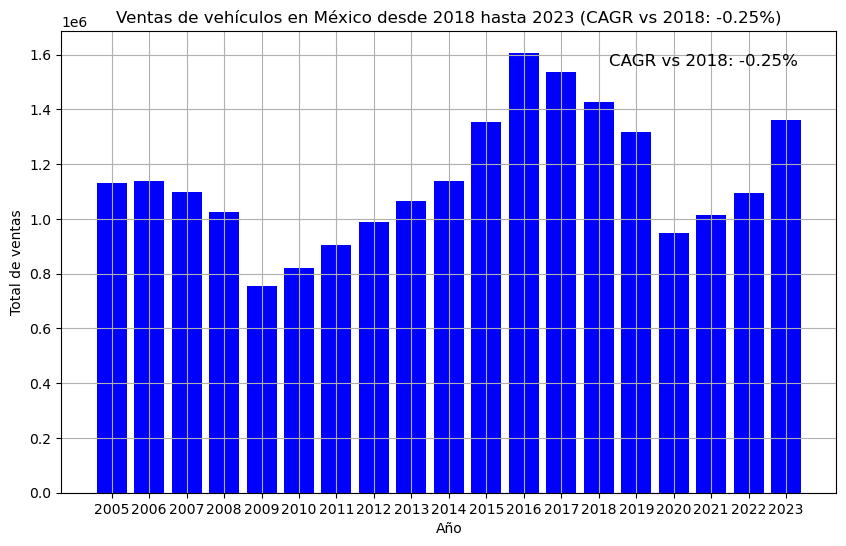

In [130]:
# Leer el archivo Excel desde la URL, comenzando desde la 6ta fila ya que en la quinta están los títulos y la última fila solo es para saber dónde acaba el data set.
df_CarsMex = pd.read_excel(url_InegiCars, header=5)
# Convertir la columna 'Cantidad' a tipo numérico
df_CarsMex['Cantidad'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce')
# Eliminar filas con valores NaN en la columna 'Cantidad'
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad'])
# Convertir el año a tipo int para facilitar la visualización
df_CarsMex['Año'] = df_CarsMex['Año'].astype(int)
# Filtrar los datos hasta el año 2023
df_CarsMex = df_CarsMex[df_CarsMex['Año'] <= 2023]
# Agrupar los datos por año y calcular la cantidad total para cada año
growth_data = df_CarsMex.groupby('Año')['Cantidad'].sum().reset_index()
# Calcular el Compound Annual Growth Rate (CAGR) con respecto a 2020
initial_value = growth_data[growth_data['Año'] == 2018]['Cantidad'].iloc[0]
final_value = growth_data['Cantidad'].iloc[-1]
num_years = growth_data['Año'].iloc[-1] - growth_data['Año'].iloc[0] + 1
cagr = (final_value / initial_value) ** (1 / num_years) - 1
# Graficar la cantidad de ventas de vehículos a través del tiempo desde 2018 hasta 2023
plt.figure(figsize=(10, 6))
plt.bar(growth_data['Año'], growth_data['Cantidad'], color='b')
plt.title('Ventas de vehículos en México desde 2018 hasta 2023 (CAGR vs 2018: {:.2%})'.format(cagr))
plt.xlabel('Año')
plt.ylabel('Total de ventas')
plt.grid(True)
plt.xticks(growth_data['Año'])  # Asegurarse de que los ticks del eje x sean los años
# Agregar texto con el CAGR en la parte superior derecha del gráfico
plt.text(0.95, 0.95, 'CAGR vs 2018: {:.2%}'.format(cagr), transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

In [131]:
# Group the data by year and calculate summary statistics for each year
statistics_by_year = df_CarsMex.groupby('Año')['Cantidad'].describe()
statistics_by_year['Total Count'] = df_CarsMex.groupby(['Año'])['Cantidad'].sum()
# Display the table of statistics
print(statistics_by_year)

# Group the data by year and calculate summary statistics for each year
statistics_by_year = df_CarsMex.groupby('Año')['Cantidad'].describe()
statistics_by_year['Total Count'] = df_CarsMex.groupby(['Año'])['Cantidad'].sum()
# Display the table of statistics
print(statistics_by_year)


       count        mean         std    min   25%   50%     75%      max  \
Año                                                                        
2005  3889.0  291.017742  638.771774   -9.0  13.0  65.0  269.00   9561.0   
2006  4054.0  281.138629  567.171393  -13.0  15.0  69.0  306.00   7431.0   
2007  4620.0  238.071429  496.322199  -14.0  14.0  53.0  245.25   6571.0   
2008  4916.0  208.613507  470.327392   -6.0  11.0  46.0  194.00   6755.0   
2009  4875.0  154.856410  376.134266  -47.0   7.0  31.0  140.00   6161.0   
2010  4612.0  177.886600  464.443696 -114.0   7.0  33.0  149.00   7250.0   
2011  4365.0  207.535624  533.015779  -14.0   8.0  39.0  174.00   5446.0   
2012  3967.0  249.065289  594.510180  -15.0  12.0  54.0  219.50   7982.0   
2013  4095.0  260.097192  625.560582   -1.0  11.0  54.0  230.00   8707.0   
2014  4130.0  275.294189  651.976833   -3.0  11.0  59.0  251.00   7744.0   
2015  4121.0  328.668770  778.136635   -1.0  14.0  73.0  293.00  10145.0   
2016  4134.0

                  Total Count
País origen Año              
Brasil      2005     219941.0
            2006     180652.0
            2007     137302.0
            2008     107568.0
            2009      67905.0
...                       ...
Other       2019     223333.0
            2020     158073.0
            2021     190837.0
            2022     200249.0
            2023     227787.0

[143 rows x 1 columns]


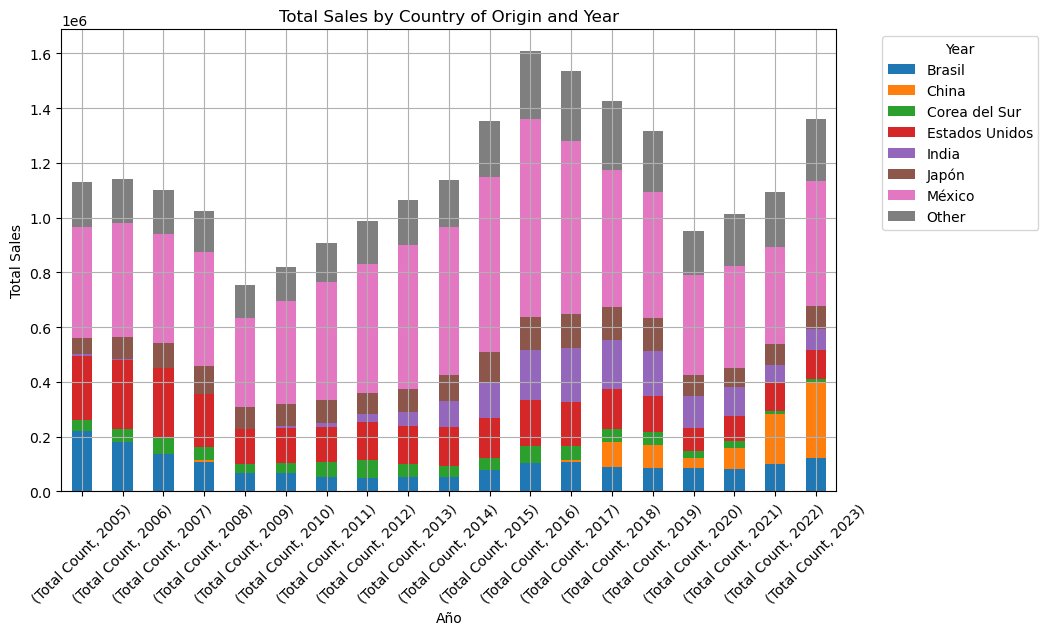

In [132]:
total_sales_by_country = df_CarsMex.groupby('País origen')['Cantidad'].sum()
# Calculate the percentage of total sales for each country
total_sales_percentage = total_sales_by_country / total_sales_by_country.sum()
# Identify the countries with total sales less than 5% of the total market
other_countries = total_sales_percentage[total_sales_percentage < 0.0335].index
# Replace the country names with 'Other' for those countries
df_CarsMex['País origen'] = df_CarsMex['País origen'].apply(lambda x: 'Other' if x in other_countries else x)
# Create an empty DataFrame to store the sum total count for each group (country and year)
sum_country_year = pd.DataFrame()
# Calculate the sum total count for each group and add it as a new column
sum_country_year['Total Count'] = df_CarsMex.groupby(['País origen', 'Año'])['Cantidad'].sum()
# Display the updated table of statistics
print(sum_country_year)
stacked_data = sum_country_year.unstack(level='Año')
# Transpose the DataFrame
stacked_data_transposed = stacked_data.T
# Plot the stacked bar chart
stacked_data_transposed.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Sales by Country of Origin and Year')
plt.xlabel('Año')
plt.ylabel('Total Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

        País origen   Año  Crecimiento de Cantidad
13           Brasil  2018                      NaN
14           Brasil  2019                -1.564228
15           Brasil  2020                -2.973164
16           Brasil  2021                -3.953588
17           Brasil  2022                23.135720
18           Brasil  2023                21.854151
24            China  2018                      NaN
25            China  2019                -9.848477
26            China  2020               -53.567041
27            China  2021               103.016891
28            China  2022               128.358602
29            China  2023                50.116596
43    Corea del Sur  2018                      NaN
44    Corea del Sur  2019                 0.711469
45    Corea del Sur  2020               -46.350753
46    Corea del Sur  2021               -12.406298
47    Corea del Sur  2022               -42.839031
48    Corea del Sur  2023                26.623891
62   Estados Unidos  2018      

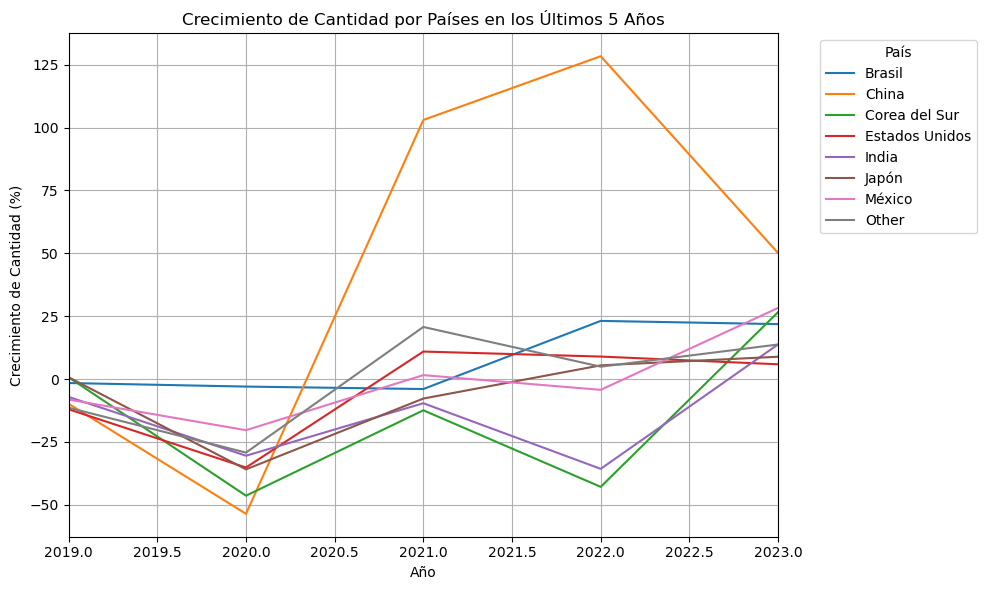

In [133]:
# Filtrar los datos para incluir solo los últimos 5 años
last_5_years_data = sum_country_year.reset_index().loc[sum_country_year.reset_index()['Año'] >= 2018]
# Calcular el porcentaje de crecimiento de cantidad para cada país en los últimos 5 años
country_growth_last_5_years = last_5_years_data.groupby('País origen')['Total Count'].pct_change() * 100
# Crear un DataFrame con el crecimiento de cantidad por países en los últimos 5 años
country_growth_df = pd.DataFrame({
    'País origen': last_5_years_data['País origen'],
    'Año': last_5_years_data['Año'],
    'Crecimiento de Cantidad': country_growth_last_5_years
})
# Imprimir el DataFrame
print(country_growth_df)
# Obtener una lista de países únicos para asignar un color a cada uno
unique_countries = country_growth_df['País origen'].unique()
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
# Graficar el crecimiento de cantidad por países en los últimos 5 años
for i, country in enumerate(unique_countries):
    country_data = country_growth_df[country_growth_df['País origen'] == country]
    plt.plot(country_data['Año'], country_data['Crecimiento de Cantidad'], label=country)
# Agregar título y etiquetas de los ejes
plt.title('Crecimiento de Cantidad por Países en los Últimos 5 Años')
plt.xlabel('Año')
plt.ylabel('Crecimiento de Cantidad (%)')
# Mostrar la leyenda con los países y ajustar la posición
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajustar los límites del eje x para que se muestren correctamente los años
plt.xlim(2019, country_growth_df['Año'].max())
# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

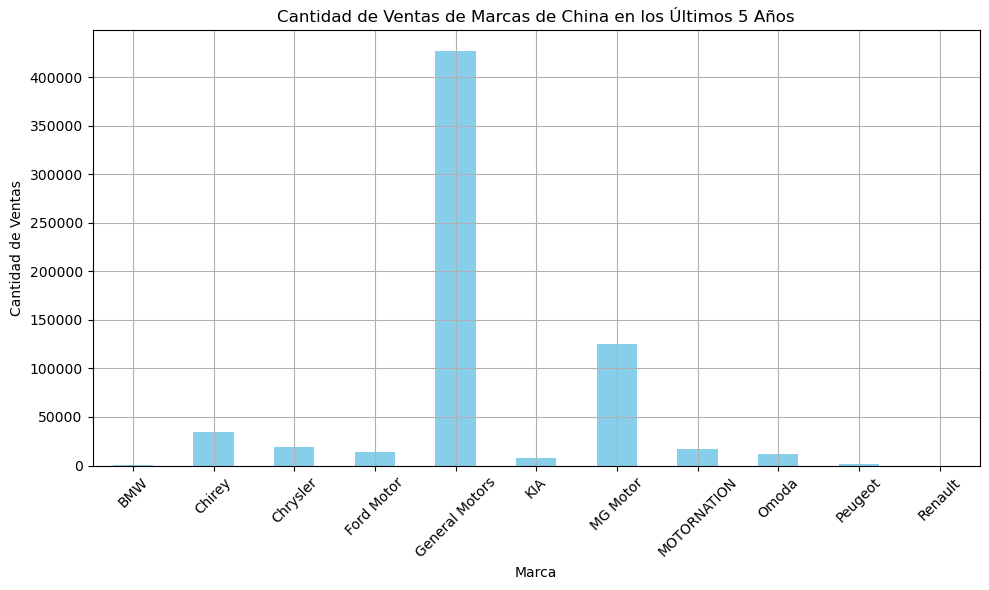

In [134]:
# Filtrar los datos para incluir solo las marcas de China y los últimos 5 años
china_brands_data_last_5_years = df_CarsMex[(df_CarsMex['País origen'] == 'China') & (df_CarsMex['Año'] >= 2019)]
# Calcular la cantidad de ventas por marca
china_brands_sales_last_5_years = china_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
china_brands_sales_last_5_years.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ventas de Marcas de China en los Últimos 5 Años')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

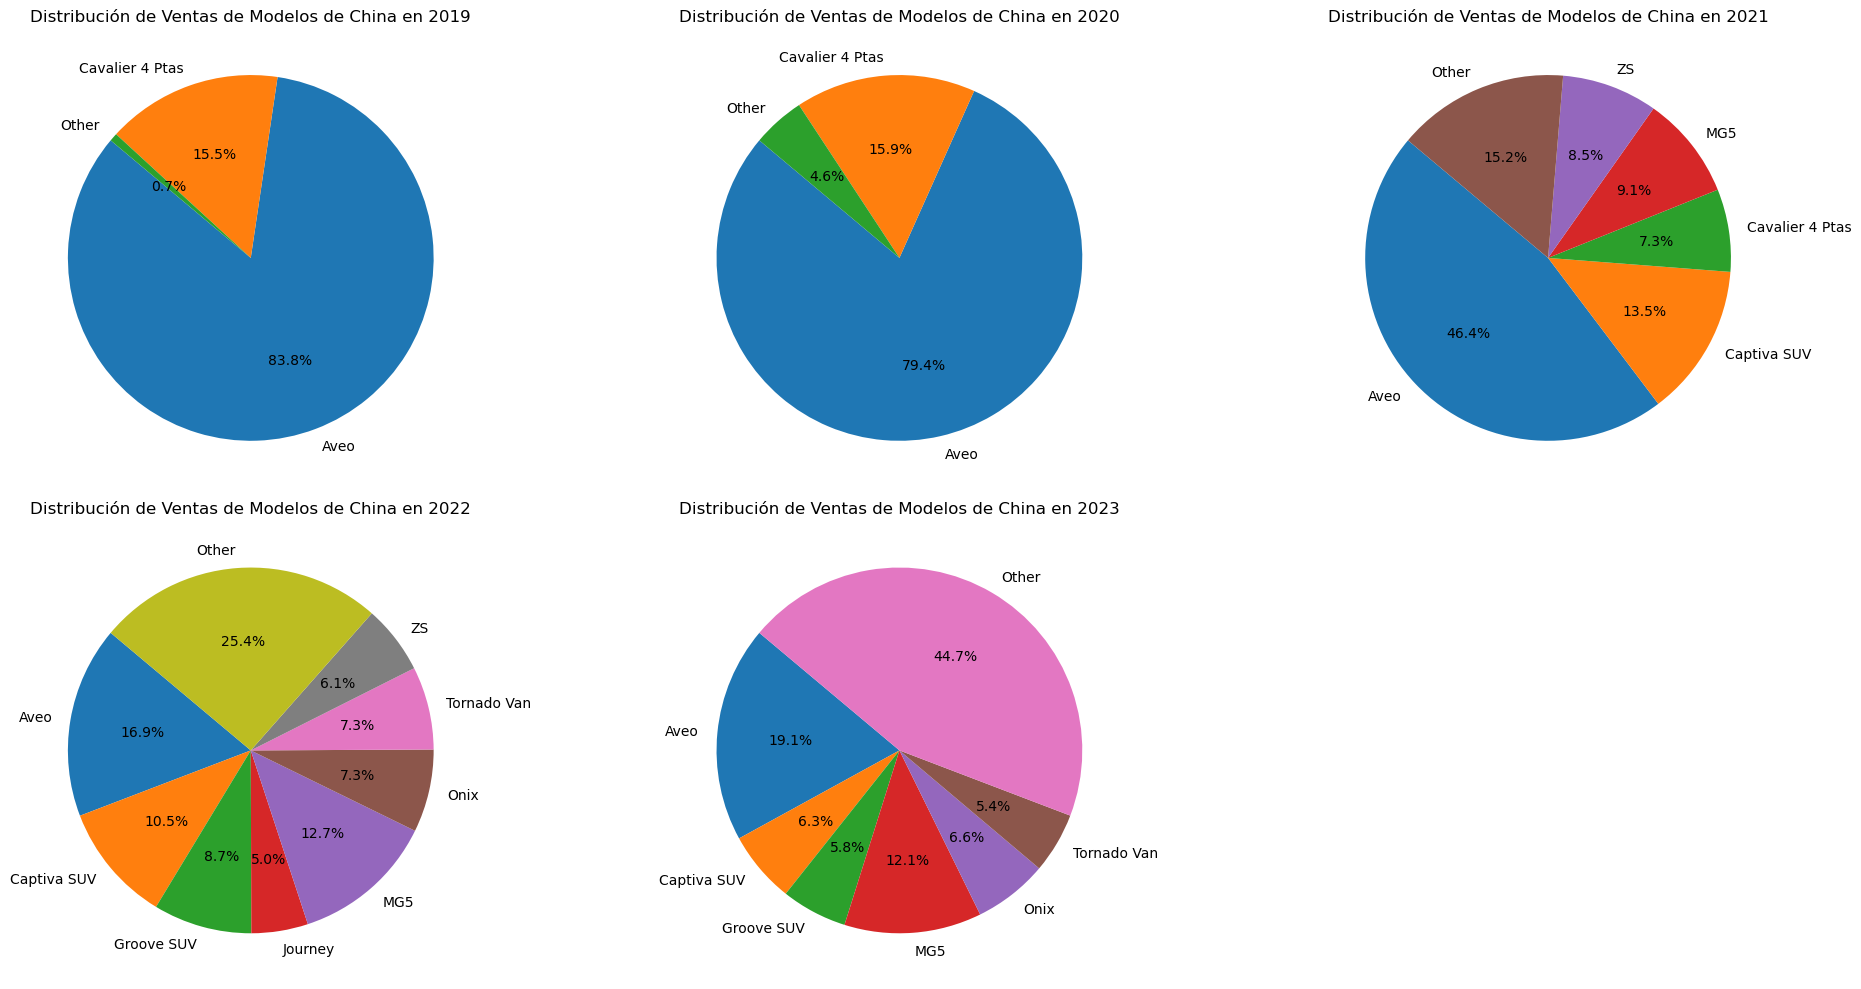

In [135]:
# Crear una lista para almacenar las gráficas de pastel
plt.figure(figsize=(20, 10))
# Iterar sobre los años
for i, year in enumerate(range(2019, 2024)):
    # Filtrar los datos para el año actual
    year_data = df_CarsMex[df_CarsMex['Año'] == year]
    # Filtrar los datos para incluir solo los modelos de China
    china_models_data = year_data[year_data['País origen'] == 'China']
    # Calcular la cantidad total de ventas para el año actual
    total_sales = china_models_data['Cantidad'].sum()
    # Calcular el porcentaje de ventas para cada modelo
    model_sales_percentage = (china_models_data.groupby('Modelo')['Cantidad'].sum() / total_sales) * 100
    # Filtrar los modelos que representan menos del 5% de las ventas y agruparlos en 'Other'
    other_models_percentage = model_sales_percentage[model_sales_percentage < 5].sum()
    model_sales_percentage = model_sales_percentage[model_sales_percentage >= 5]
    model_sales_percentage['Other'] = other_models_percentage
    # Crear la gráfica de pastel para el año actual
    plt.subplot(2, 3, i+1)
    plt.pie(model_sales_percentage, labels=model_sales_percentage.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Ventas de Modelos de China en {year}')
plt.tight_layout()
plt.show()

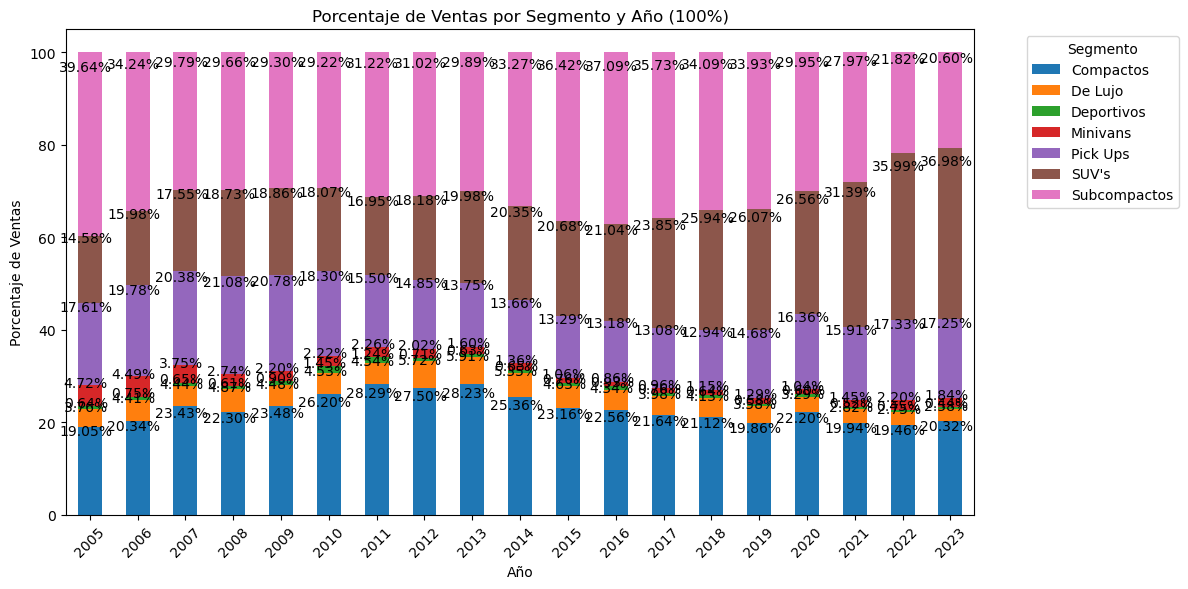

In [136]:
# Calcular el total de ventas por año
ventas_por_ano = df_CarsMex.groupby('Año')['Cantidad'].sum()
# Agrupar por año y segmento, y sumar las ventas
ventas_por_segmento_ano = df_CarsMex.groupby(['Año', 'Segmento'])['Cantidad'].sum().unstack()
# Calcular el porcentaje de ventas de cada segmento por año
porcentaje_ventas = ventas_por_segmento_ano.div(ventas_por_ano, axis=0) * 100
# Graficar la gráfica de barras de 100%
ax = porcentaje_ventas.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Porcentaje de Ventas por Segmento y Año (100%)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add values on top of bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/3, y + height*.9), ha='center')
plt.tight_layout()
plt.show()

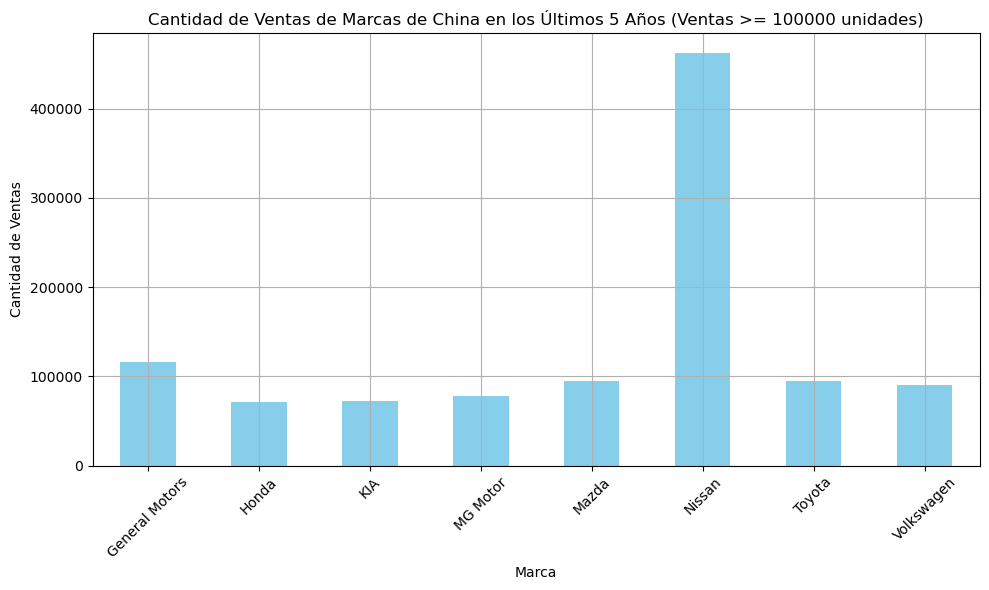

In [137]:
# Filtrar los datos para incluir solo las marcas de China y los últimos 5 años
Compact_brands_data_last_5_years = df_CarsMex[(df_CarsMex['Segmento'] == 'Compactos') & (df_CarsMex['Año'] >= 2019)]
# Calcular la cantidad de ventas por marca
Compact_brands_data_last_5_years = Compact_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()
# Filtrar las marcas con una cantidad menor a 5000 unidades
Compact_brands_data_last_5_years_filtered = Compact_brands_data_last_5_years[Compact_brands_data_last_5_years >= 50000]
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
Compact_brands_data_last_5_years_filtered.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ventas de Marcas de China en los Últimos 5 Años (Ventas >= 100000 unidades)')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

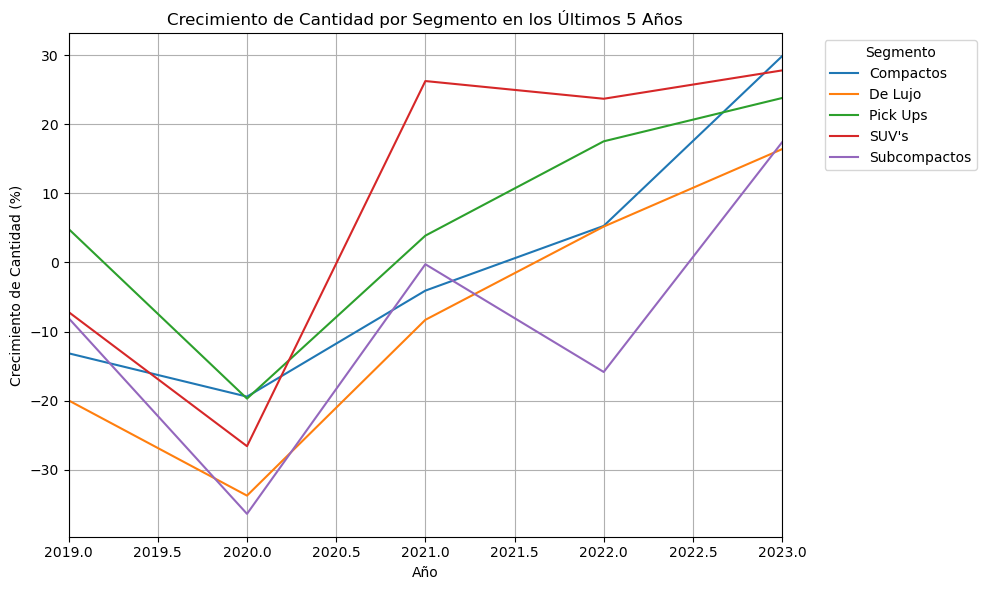

In [138]:
# Calcular las ventas totales por segmento
total_sales_by_segment = df_CarsMex.groupby('Segmento')['Cantidad'].sum()
# Calcular el porcentaje de ventas totales para cada segmento
total_sales_segment_percentage = total_sales_by_segment / total_sales_by_segment.sum()
# Identificar los segmentos con ventas totales menos del 3.35% del mercado total
other_segments = total_sales_segment_percentage[total_sales_segment_percentage < 0.0335].index
# Reemplazar los nombres de los segmentos con 'Other' para aquellos con ventas totales menos del 3.35%
df_CarsMex['Segmento'] = df_CarsMex['Segmento'].apply(lambda x: 'Other' if x in other_segments else x)
# Crear un DataFrame vacío para almacenar la suma total de ventas para cada grupo (segmento y año)
sum_segment_year = pd.DataFrame()
# Calcular la suma total de ventas para cada grupo y agregarla como una nueva columna
sum_segment_year['Total Count'] = df_CarsMex.groupby(['Segmento', 'Año'])['Cantidad'].sum()
# Filtrar los datos para incluir solo los últimos 5 años
last_5_years_data_segment = sum_segment_year.reset_index().loc[sum_segment_year.reset_index()['Año'] >= 2018]
# Calcular el porcentaje de crecimiento de cantidad para cada segmento en los últimos 5 años
segment_growth_last_5_years = last_5_years_data_segment.groupby('Segmento')['Total Count'].pct_change() * 100
# Crear un DataFrame con el crecimiento de cantidad por segmento en los últimos 5 años
segment_growth_df = pd.DataFrame({
    'Segmento': last_5_years_data_segment['Segmento'],
    'Año': last_5_years_data_segment['Año'],
    'Crecimiento de Cantidad': segment_growth_last_5_years
})
# Obtener una lista de segmentos únicos para asignar un color a cada uno
unique_segments = segment_growth_df['Segmento'].unique()
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
# Graficar el crecimiento de cantidad por segmento en los últimos 5 años
for segment in unique_segments:
    if segment != 'Other':  # Exclude 'Other' category
        segment_data = segment_growth_df[segment_growth_df['Segmento'] == segment]
        plt.plot(segment_data['Año'], segment_data['Crecimiento de Cantidad'], label=segment)
# Agregar título y etiquetas de los ejes
plt.title('Crecimiento de Cantidad por Segmento en los Últimos 5 Años')
plt.xlabel('Año')
plt.ylabel('Crecimiento de Cantidad (%)')
# Mostrar la leyenda con los segmentos y ajustar la posición
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajustar los límites del eje x para que se muestren correctamente los años
plt.xlim(2019, segment_growth_df['Año'].max())
# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

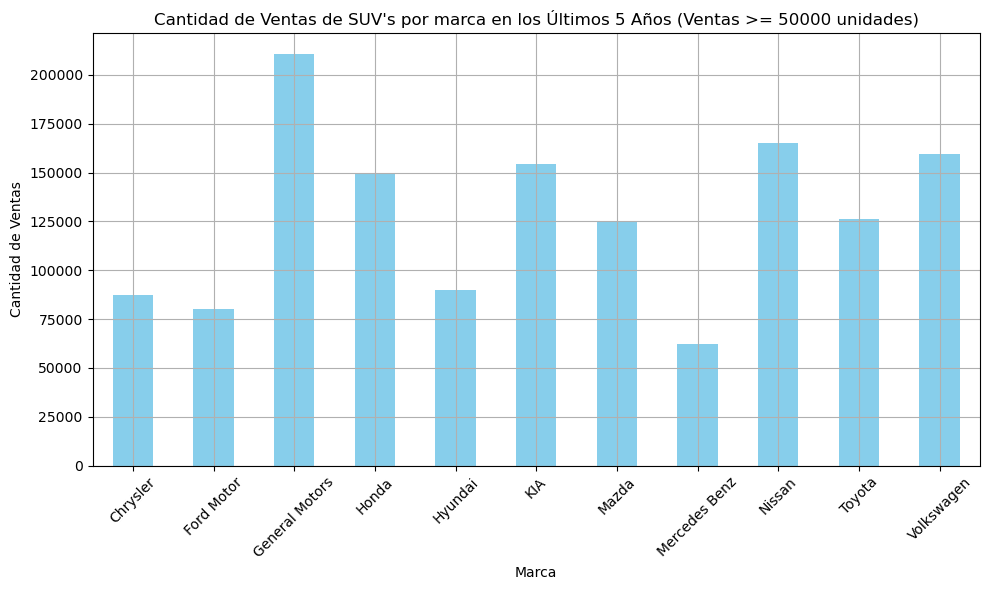

In [139]:
# Filtrar los datos para incluir solo las marcas de China y los últimos 5 años
SUV_brands_data_last_5_years = df_CarsMex[(df_CarsMex['Segmento'] == "SUV's") & (df_CarsMex['Año'] >= 2019)]
# Calcular la cantidad de ventas por marca
SUV_brands_data_last_5_years = SUV_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()
# Filtrar las marcas con una cantidad menor a 5000 unidades
SUV_brands_data_last_5_years_filtered = SUV_brands_data_last_5_years[SUV_brands_data_last_5_years >= 50000]
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
SUV_brands_data_last_5_years_filtered.plot(kind='bar', color='skyblue')
plt.title("Cantidad de Ventas de SUV's por marca en los Últimos 5 Años (Ventas >= 50000 unidades)")
plt.xlabel('Marca')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

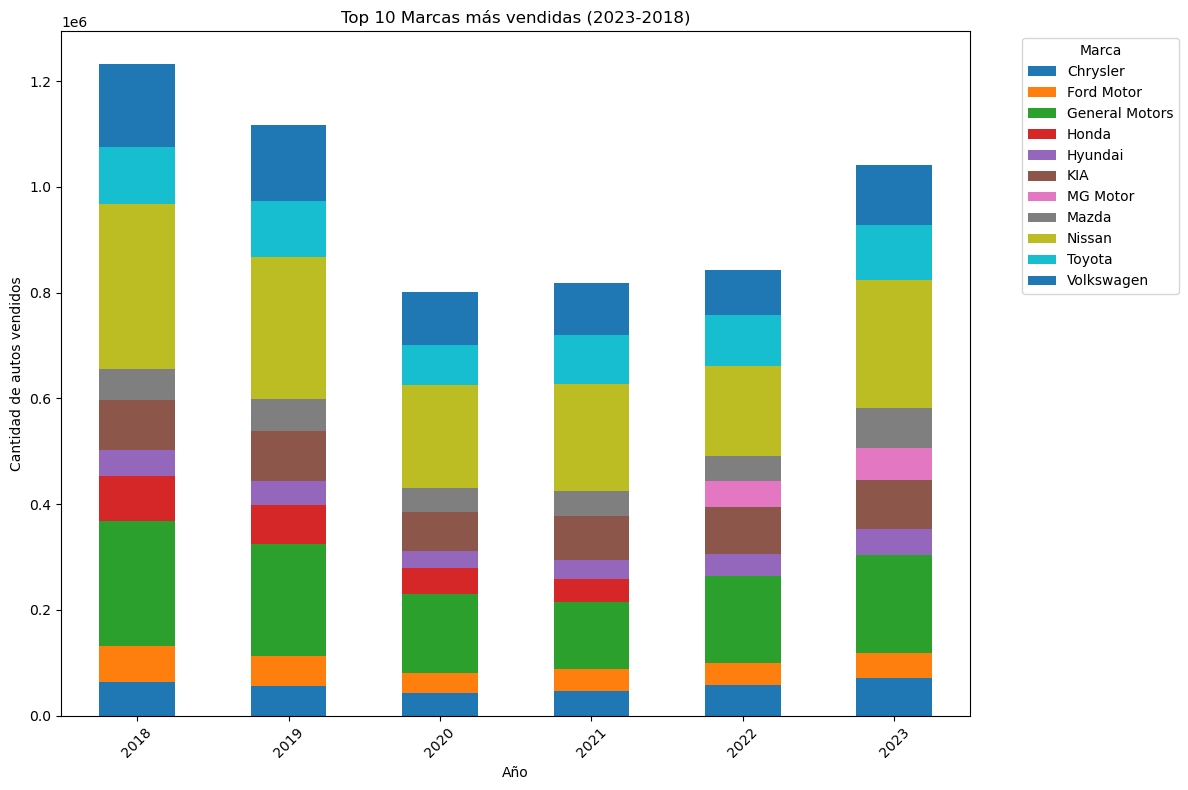

In [140]:
# Crear un diccionario para almacenar las ventas de las 10 marcas más vendidas por año
ventas_por_año = {}
# Iterar sobre los años desde 2023 hasta 2018
for year in range(2023, 2017, -1):
    # Filtrar los datos para el año actual
    df_ventas_year = df_CarsMex[df_CarsMex['Año'] == year]
    # Agrupar por marca y sumar las ventas para el año actual
    ventas_por_marca_year = df_ventas_year.groupby('Marca')['Cantidad'].sum().nlargest(10)
    # Almacenar las ventas por marca para el año actual en el diccionario
    ventas_por_año[year] = ventas_por_marca_year
# Crear un DataFrame con las ventas de las 10 marcas más vendidas para cada año
df_ventas_stacked = pd.DataFrame(ventas_por_año)
# Transponer el DataFrame para tener los años como índice y las marcas como columnas
df_ventas_stacked = df_ventas_stacked.T
# Invertir el orden de las filas en el DataFrame
df_ventas_stacked = df_ventas_stacked.iloc[::-1]
# Crear un gráfico de barras apiladas con el nuevo orden de las filas
df_ventas_stacked.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Año')
plt.ylabel('Cantidad de autos vendidos')
plt.title('Top 10 Marcas más vendidas (2023-2018)')
plt.xticks(rotation=45)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()